# Student Mental health analysis

### import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os


## read dataset

In [2]:
df = pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")

In [3]:
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


### Exploratory Data Analysis¶


In [4]:
df.shape

(101, 11)

In [5]:
df.set_index('Timestamp',inplace=True)

In [6]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [7]:
df.head(10)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
Timestamp,,,,,,,,,,
8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No


### missing value

In [8]:
df.isnull().sum()

Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [9]:
df['Age']=df['Age'].fillna(int(df['Age'].mean()))

In [10]:
df.isnull().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

### find non duplicated courses in dataset

In [11]:
arr = df["What is your course?"].unique()
arr

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

### make some visualization to find answers

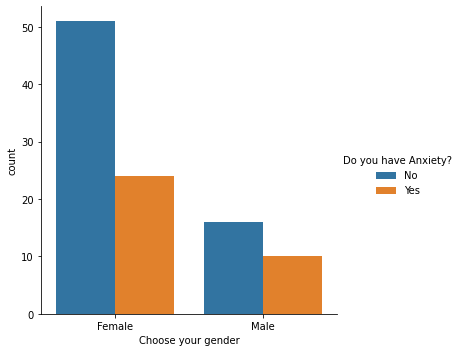

In [12]:
sns.catplot(x='Choose your gender',hue='Do you have Anxiety?',kind='count',data=df)

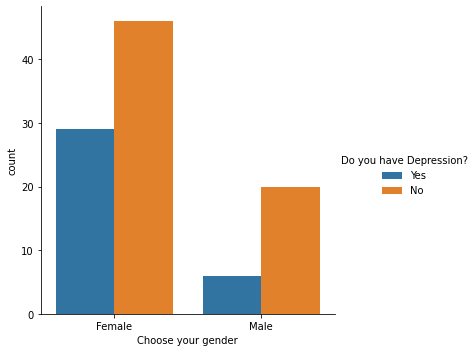

In [13]:
sns.catplot(x='Choose your gender',hue='Do you have Depression?',kind='count',data=df)

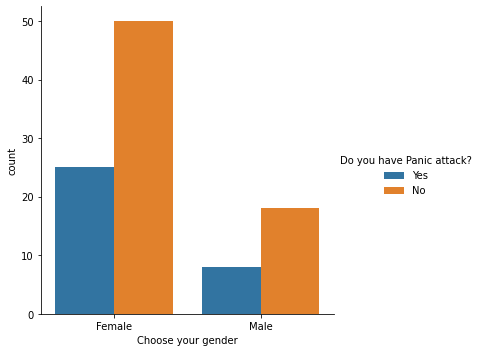

In [14]:
sns.catplot(x='Choose your gender',hue='Do you have Panic attack?',kind='count',data=df)

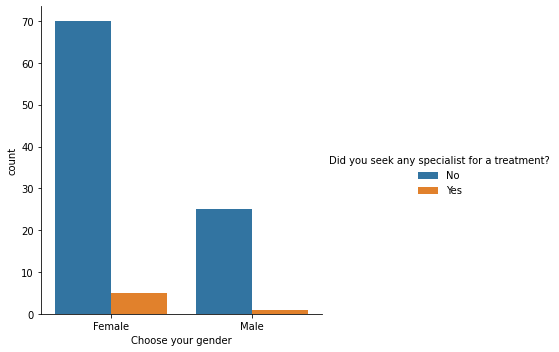

In [15]:
sns.catplot(x='Choose your gender',hue='Did you seek any specialist for a treatment?',kind='count',data=df)

<AxesSubplot:xlabel='Marital status', ylabel='count'>

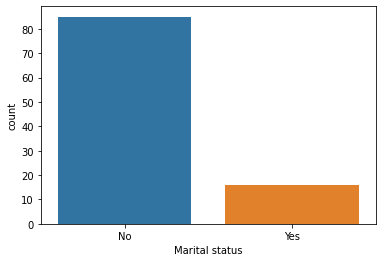

In [16]:
 sns.countplot(x="Marital status",data=df)

### so in this figures we see the female more senstive than male and have alot of Depression and the most of students are single 

<AxesSubplot:xlabel='Age', ylabel='count'>

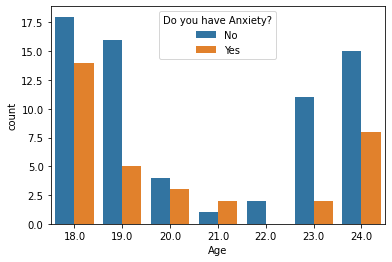

In [17]:
 sns.countplot(x="Age", hue='Do you have Anxiety?',data=df)

<AxesSubplot:xlabel='Your current year of Study', ylabel='count'>

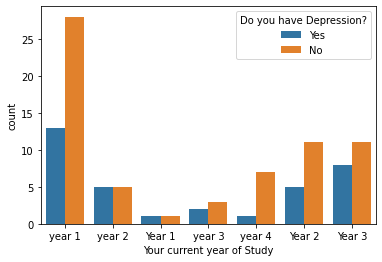

In [18]:
 sns.countplot(x="Your current year of Study", hue='Do you have Depression?',data=df)

### A lot of depression and anxiety come in the first year and his age is 18, which means that the student is afraid of the unknown and doubts the extent of his ability to choose his field of study.

<AxesSubplot:xlabel='What is your CGPA?', ylabel='count'>

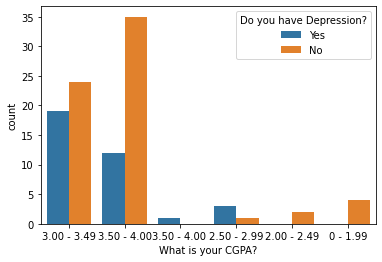

In [19]:
 sns.countplot(x="What is your CGPA?", hue='Do you have Depression?',data=df)

### but the most of students have a high GPA which mean the Depression has a little effect on GPA

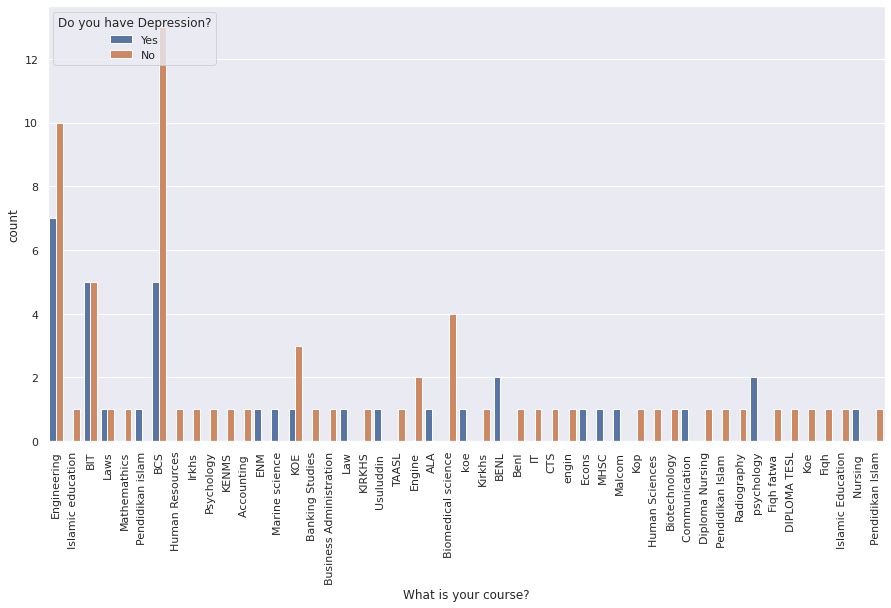

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
yr=sns.countplot(x='What is your course?',hue='Do you have Depression?',data=df)
yr.set_xticklabels(yr.get_xticklabels(),rotation=90);

### clearly in this viz the most study field has alot of Depression is Engineering 

### Therefore, females are more sensitive than males, and students have more depression in the first year. To solve this problem, the field of study must be clearly defined for the student to have confidence in his choice and provide psychological support to students more in the first year and those of young ages and give support to whoes study Engineering